In [64]:
pwd

u'/home/ynu/PLUTO/20191127_2048'

In [65]:
cd /home/ynu/PLUTO/20191127_2048/

/home/ynu/PLUTO/20191127_2048


In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pyPLUTO as pp
%matplotlib inline

In [67]:
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.top']='True'
plt.rcParams['ytick.right']='True'
plt.rcParams['font.size']=14 #字体大小 包括xy轴的字体 colorbar的字体

In [68]:
D = pp.pload(10) # Loading the data into a pload object D.
#grid.out dbl.out should contain

In [69]:
type(D.rho.T)

numpy.ndarray

In [70]:
D.rho.T.size

4194304

In [71]:
D.rho.T.shape

(2048, 2048)

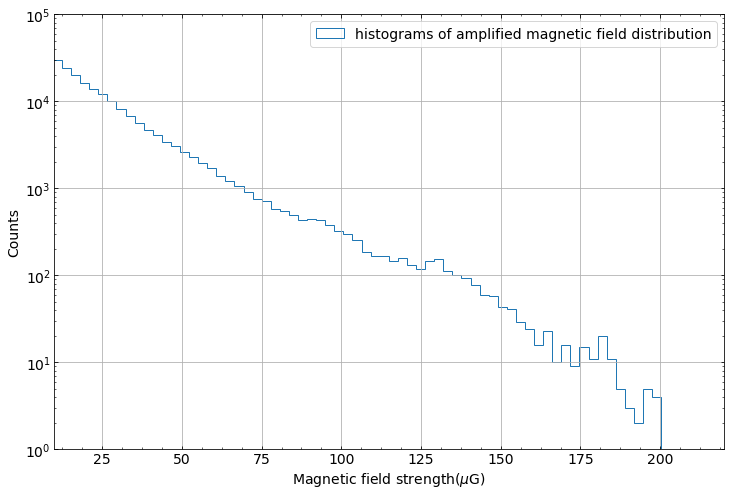

In [72]:
f1 = plt.figure(figsize=[12,8])
ax1 = f1.add_subplot(111)
new_arr = np.sqrt(D.bx1.T*D.bx1.T+D.bx2.T*D.bx2.T)*460.0+0.999
#type(new_arr)
#new_arr.size
#new_arr.shape

new_arr1 = new_arr.flatten()#to 1d
#new_arr1.shape

plt.hist(x=new_arr1,bins=70,log=True,histtype='step',label='histograms of amplified magnetic field distribution')
plt.minorticks_on()
plt.grid(True)
plt.legend(loc=0,ncol=1)#0 is auto-set while ncol is lie shu
font1={'size':14}
ax1.set_xlabel(r'Magnetic field strength($\mu$G)',font1)
ax1.set_ylabel(r'Counts',font1)
ax1.axis([10.0,220.0,1.0,1.0e5])
plt.savefig('mag_counts_2048.png',bbox_inches='tight')#不能存为pdf会跑挂

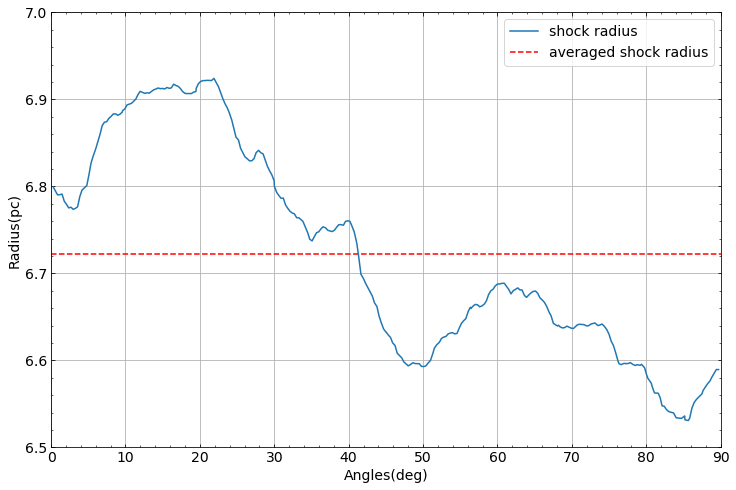

In [73]:
filename = 'radave300_2048.txt'
X1,Y1 = [],[]
with open(filename,'r') as f:
    lines = f.readlines()
    for line in lines:
        value = [float(s) for s in line.split()]
        X1.append(value[0])
        Y1.append(value[1])
X1new = np.array(X1)
Y1new = np.array(Y1) # in order for mean() and other statistics funs
#print(X1new)
#print(Y1new)
#print(Y1new.mean())



f2 = plt.figure(figsize=[12,8]) 
ax2 = f2.add_subplot(111) 
#plt.plot(Xnew,Ynew)
plt.plot(X1new,Y1new,label='shock radius')
plt.hlines(y=Y1new.mean(),xmin=0.0,xmax=90.0,colors='r',linestyles='--',label='averaged shock radius')
plt.grid(True)
plt.minorticks_on()
plt.legend(loc=0,ncol=1)#0 is auto-set while ncol is lie shu 
font1={'size':14}
ax2.set_xlabel(r'Angles(deg)',fontdict=font1) 
ax2.set_ylabel(r'Radius(pc)',fontdict=font1) 
ax2.axis([0.0,90.0,6.5,7.0])
#ax1.set_title(r'radius profile with t=1000 years')
plt.savefig('radius_average_2048.png',bbox_inches='tight')#不能存为pdf会跑挂

[0.0, 90.0, 5.6, 6.9]

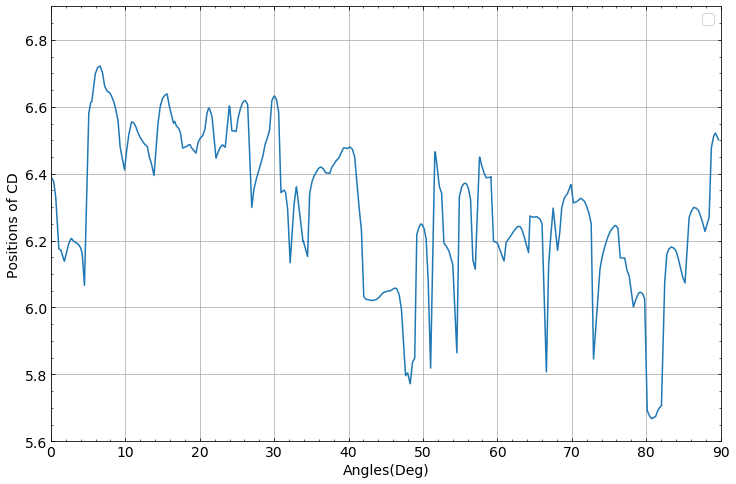

In [74]:
filename = 'rcdave30013_2048.txt'
Xcd1,Ycd1 = [],[]
with open(filename,'r') as f:
    lines = f.readlines()
    for line in lines:
        value = [float(s) for s in line.split()]
        Xcd1.append(value[0])
        Ycd1.append(value[1])
Xcd1new = np.array(Xcd1)
Ycd1new = np.array(Ycd1) # in order for mean() and other statistics funs

fcd = plt.figure(figsize=[12,8]) 
ax3 = fcd.add_subplot(111) 
plt.plot(Xcd1new,Ycd1new)
plt.grid(True)
plt.minorticks_on()
plt.legend(loc=0,ncol=1)#0 is auto-set while ncol is lie shu 
ax3.set_xlabel(r'Angles(Deg)') 
ax3.set_ylabel(r'Positions of CD') 
ax3.axis([0.0,90.0,5.6,6.9])
#ax1.set_title(r'radius profile with t=1000 years')
#plt.savefig('cd_radius_2048.png')#不能存为pdf会跑挂

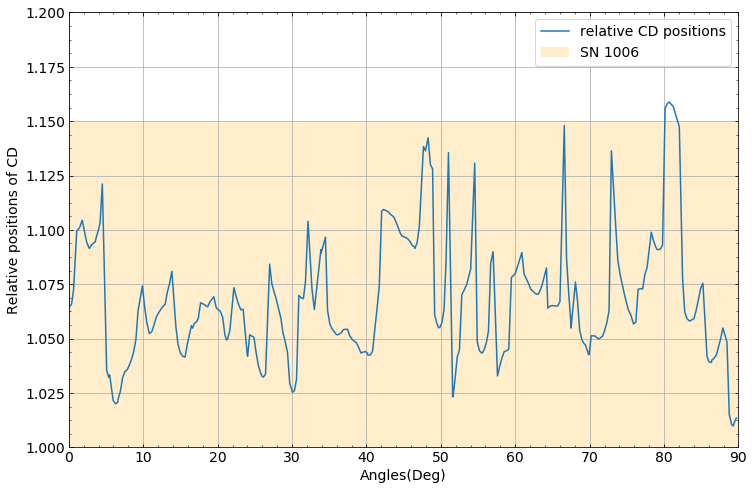

In [75]:
#fill the region of SN1006
Xfill = np.linspace(0.0,90.0,1000)
y1=1.00
y2=1.15


fcd = plt.figure(figsize=[12,8]) 
ax4 = fcd.add_subplot(111) 
plt.plot(Xcd1new,Y1new/Ycd1new,label='relative CD positions')
plt.fill_between(Xfill,y1,y2,facecolor='orange',alpha=0.2,label='SN 1006')
plt.grid(True)
plt.minorticks_on()
plt.legend(loc=0,ncol=1)#0 is auto-set while ncol is lie shu 
font1={'size':14}
ax4.set_xlabel(r'Angles(Deg)',font1) 
ax4.set_ylabel(r'Relative positions of CD',font1) 
ax4.axis([0.0,90.0,1.0,1.2])
#ax1.set_title(r'radius profile with t=1000 years')
plt.savefig('cd_ratio_SN1006_2048.png',bbox_inches='tight')#不能存为pdf会跑挂

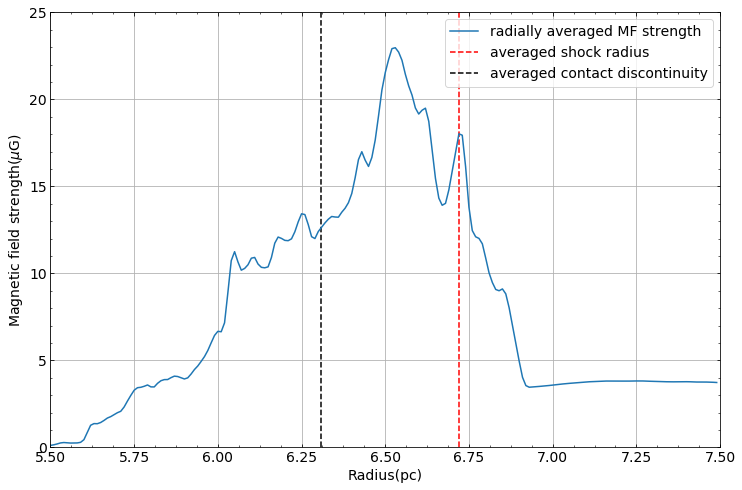

In [76]:
filename = 'magave_2048.txt'
X,Y = [],[]
with open(filename,'r') as f:
    lines = f.readlines()
    for line in lines:
        value = [float(s) for s in line.split()]
        X.append(value[0])
        Y.append(value[1])
Xnew = np.array(X)
Ynew1 = np.array(Y)#mag in code unit

f3 = plt.figure(figsize=[12,8]) 
ax5 = f3.add_subplot(111) 
plt.plot(Xnew,Ynew1*460.0,label='radially averaged MF strength')#460.0 is to muG
plt.vlines(x=Y1new.mean(),ymin=0.0,ymax=25.0,colors='r',linestyles='--',label='averaged shock radius')
plt.vlines(x=Ycd1new.mean(),ymin=0.0,ymax=25.0,colors='k',linestyles='--',label='averaged contact discontinuity')
plt.grid(True)
plt.minorticks_on()
plt.legend(loc=0,ncol=1)#0 is auto-set while ncol is lie shu 
font1={'size':14}
ax5.set_xlabel(r'Radius(pc)',font1) 
ax5.set_ylabel(r'Magnetic field strength($\mu$G)',font1) 
ax5.axis([5.5,7.5,0.0,25.0])
plt.savefig('mag_average_2048.png',bbox_inches='tight')#不能存为pdf会跑挂

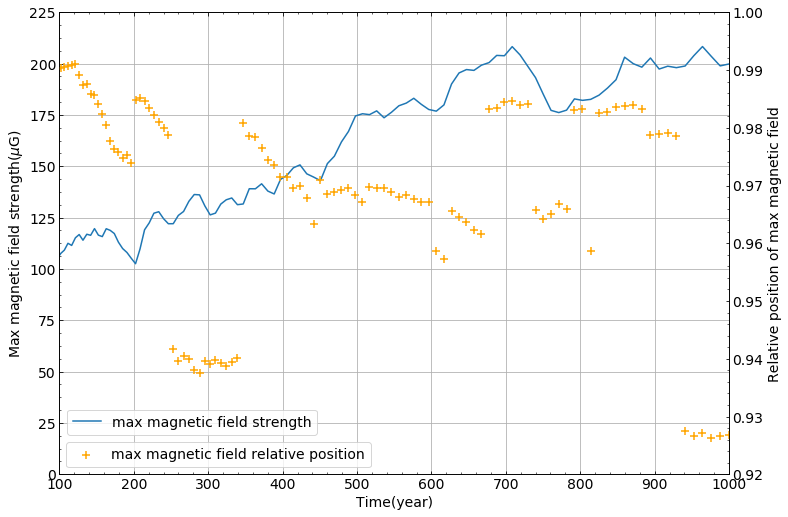

In [88]:
filename = 'maxmag_2048.txt'
X,Y = [],[]
with open(filename,'r') as f:
    lines = f.readlines()
    for line in lines:
        value = [float(s) for s in line.split()]
        X.append(value[0])
        Y.append(value[1])
Xnew = np.array(X)
Ynew = np.array(Y)#mag in code unit

filename = 'magpos_2048.txt'
xpos,ypos = [],[]
with open(filename,'r') as f:
    lines = f.readlines()
    for line in lines:
        value = [float(s) for s in line.split()]
        xpos.append(value[0])
        ypos.append(value[1])
xposnew = np.array(xpos)
yposnew = np.array(ypos)#mag in code unit

f3 = plt.figure(figsize=[12,8.5]) 
ax1 = f3.add_subplot(111) 
ls1=ax1.plot(Xnew*1000.0,Ynew*460.0,label='max magnetic field strength')#460.0 is to muG
plt.grid(True)
plt.minorticks_on()
#plt.legend(loc=2,ncol=1)#0 is auto-set while ncol is lie shu 
ax1.legend(bbox_to_anchor=(0.395,0.155),fontsize=14)#0 is auto-set while ncol is lie shu 
font1={'size':14}
ax1.set_xlabel(r'Time(year)',font1) 
ax1.set_ylabel(r'Max magnetic field strength($\mu$G)',font1) 
ax1.axis([100,1000,0.0,225.0])
ax2 = ax1.twinx()
font1={'size':14}
ax2.set_ylabel(r'Relative position of max magnetic field',font1) 
ls2=ax2.scatter(xposnew*1000.0,yposnew,color='orange',marker='+',s=55,label='max magnetic field relative position')
plt.minorticks_on()
#ax2.legend(bbox_to_anchor=(0.48,0.1),fontsize=14)#0 is auto-set while ncol is lie shu 
ax2.legend(loc=3,ncol=1)#0 is auto-set while ncol is lie shu 
ax2.axis([100,1000,0.92,1.0])

#ls = ls1 + ls2
#labs=[l.get_label() for l in ls]
#ax1.legend(ls,labs,loc=3)

plt.savefig('max_mag_pos_2048.png',bbox_inches='tight')#不能存为pdf会跑挂

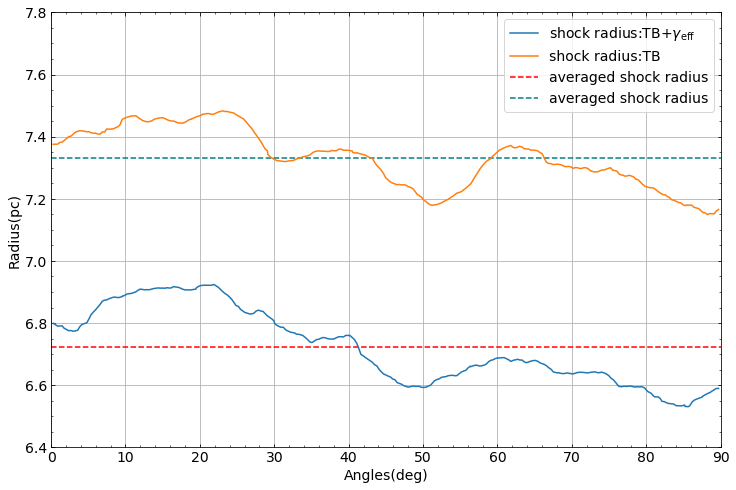

In [78]:
filename = 'radave300_2048.txt'
X4,Y4 = [],[]
with open(filename,'r') as f:
    lines = f.readlines()
    for line in lines:
        value = [float(s) for s in line.split()]
        X4.append(value[0])
        Y4.append(value[1])
X4new = np.array(X4)
Y4new = np.array(Y4) # in order for mean() and other statistics funs


filename = 'radave300onlytur_2048.txt'
X4t,Y4t = [],[]
with open(filename,'r') as f:
    lines = f.readlines()
    for line in lines:
        value = [float(s) for s in line.split()]
        X4t.append(value[0])
        Y4t.append(value[1])
X4tnew = np.array(X4t)
Y4tnew = np.array(Y4t) # in order for mean() and other statistics funs


f3 = plt.figure(figsize=[12,8]) 
ax1 = f3.add_subplot(111) 
#plt.plot(Xnew,Ynew)
plt.plot(X4new,Y4new,label='shock radius:TB+$\gamma\mathregular{_{eff}}$')
plt.hlines(y=Y4new.mean(),xmin=0.0,xmax=90.0,colors='red',linestyles='--',label='averaged shock radius')
plt.plot(X4tnew,Y4tnew,label='shock radius:TB')
plt.hlines(y=Y4tnew.mean(),xmin=0.0,xmax=90.0,colors='teal',linestyles='--',label='averaged shock radius')
plt.grid(True)
plt.minorticks_on()
plt.legend(loc=0,ncol=1)#0 is auto-set while ncol is lie shu 
font1={'size':14}
ax1.set_xlabel(r'Angles(deg)',fontdict=font1) 
ax1.set_ylabel(r'Radius(pc)',fontdict=font1) 
ax1.axis([0.0,90.0,6.4,7.8])
plt.savefig('rad_ave_compared_2048.png',bbox_inches='tight')#不能存为pdf会跑挂

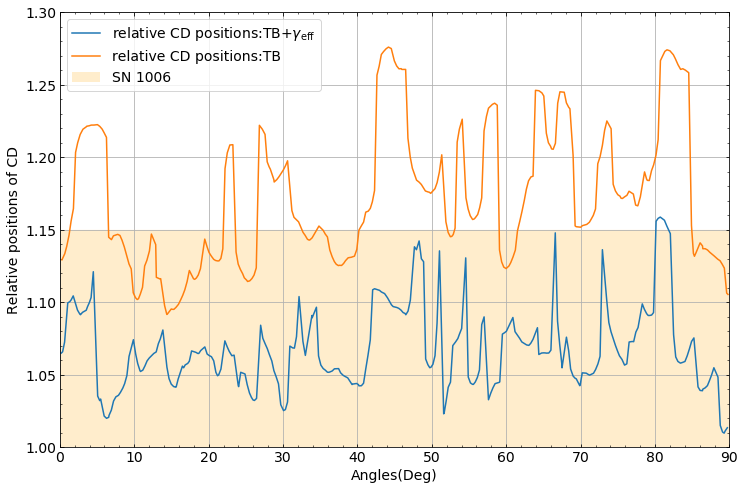

In [79]:
filename = 'rcdave30013_2048.txt'
Xcd,Ycd = [],[]
with open(filename,'r') as f:
    lines = f.readlines()
    for line in lines:
        value = [float(s) for s in line.split()]
        Xcd.append(value[0])
        Ycd.append(value[1])
Xcdnew = np.array(Xcd)
Ycdnew = np.array(Ycd) # in order for mean() and other statistics funs

Xfill = np.linspace(0.0,90.0,1000)
y1=1.0
y2=1.15


filename = 'rcdave30013_onlytur_2048.txt'
Xcdt,Ycdt = [],[]
with open(filename,'r') as f:
    lines = f.readlines()
    for line in lines:
        value = [float(s) for s in line.split()]
        Xcdt.append(value[0])
        Ycdt.append(value[1])
Xcdtnew = np.array(Xcdt)
Ycdtnew = np.array(Ycdt) # in order for mean() and other statistics funs



fcd = plt.figure(figsize=[12,8]) 
ax1 = fcd.add_subplot(111) 
plt.plot(Xcd1new,Y4new/Ycd1new,label='relative CD positions:TB+$\gamma\mathregular{_{eff}}$')
plt.fill_between(Xfill,y1,y2,facecolor='orange',alpha=0.2,label='SN 1006')
plt.plot(Xcdtnew,Y4tnew/Ycdtnew,label='relative CD positions:TB')
plt.grid(True)
plt.minorticks_on()
plt.legend(loc=0,ncol=1)#0 is auto-set while ncol is lie shu 
font1={'size':14}
ax1.set_xlabel(r'Angles(Deg)',font1) 
ax1.set_ylabel(r'Relative positions of CD',font1) 
ax1.axis([0.0,90.0,1.0,1.3])
#ax1.set_title(r'radius profile with t=1000 years')
plt.savefig('cd_ratio_SN1006_compared_2048.png',bbox_inches='tight')#不能存为pdf会跑挂

[0.0, 90.0, 4.0, 5.0]

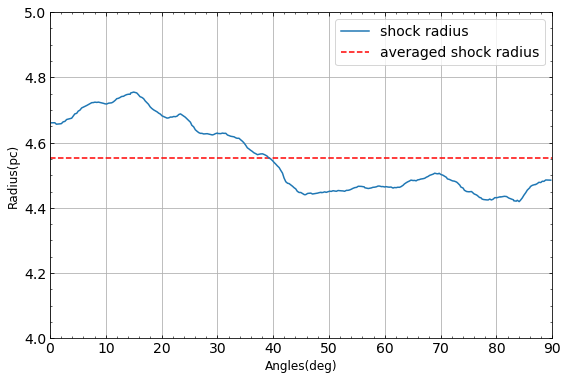

In [80]:
filename = 'radave300tycho_2048.txt'
Xtycho,Ytycho = [],[]
with open(filename,'r') as f:
    lines = f.readlines()
    for line in lines:
        value = [float(s) for s in line.split()]
        Xtycho.append(value[0])
        Ytycho.append(value[1])
Xtychonew = np.array(Xtycho)
Ytychonew = np.array(Ytycho) # in order for mean() and other statistics funs
#print(X4new)
#print(Y4new)
#print(Y4new.mean())



f6 = plt.figure(figsize=[9,6]) 
ax6 = f6.add_subplot(111) 
#plt.plot(Xnew,Ynew)
plt.plot(Xtychonew,Ytychonew,label='shock radius')
plt.hlines(y=Ytychonew.mean(),xmin=0.0,xmax=90.0,colors='r',linestyles='--',label='averaged shock radius')
plt.grid(True)
plt.minorticks_on()
plt.legend(loc=0,ncol=1)#0 is auto-set while ncol is lie shu 
font1={'size':12}
ax6.set_xlabel(r'Angles(deg)',fontdict=font1) 
ax6.set_ylabel(r'Radius(pc)',fontdict=font1) 
ax6.axis([0.0,90.0,4.0,5.0])
#ax1.set_title(r'radius profile with t=1000 years')
#plt.savefig('radius_average.png')#不能存为pdf会跑挂

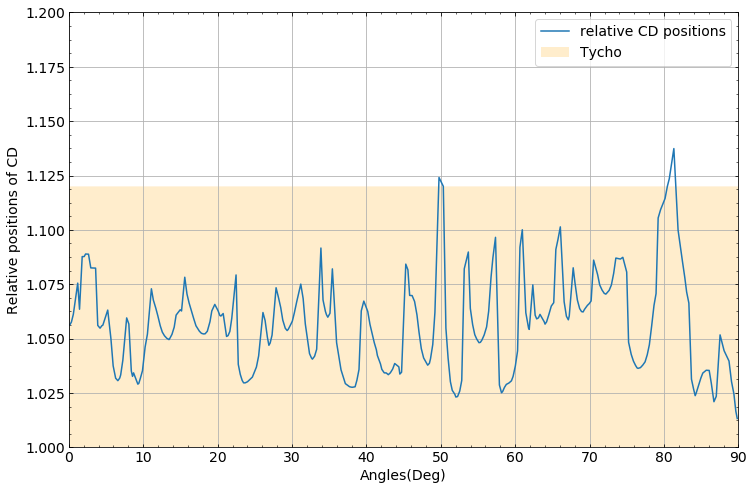

In [81]:
filename = 'rcdave300tycho_2048.txt'
Xcdtycho,Ycdtycho = [],[]
with open(filename,'r') as f:
    lines = f.readlines()
    for line in lines:
        value = [float(s) for s in line.split()]
        Xcdtycho.append(value[0])
        Ycdtycho.append(value[1])
Xcdnewt = np.array(Xcdtycho)
Ycdnewt = np.array(Ycdtycho) # in order for mean() and other statistics funs

Xfill = np.linspace(0.0,90.0,1000)
y1=1.00
y2=1.12 #tycho warren 2005






fcd = plt.figure(figsize=[12,8]) 
ax1 = fcd.add_subplot(111) 
plt.plot(Xcdnewt,Ytychonew/Ycdnewt,label='relative CD positions')
plt.fill_between(Xfill,y1,y2,facecolor='orange',alpha=0.2,label='Tycho')
#plt.plot(Xcdtnew,Y4tnew/Ycdtnew,label='relative CD positions:tb')
plt.grid(True)
plt.minorticks_on()
plt.legend(loc=0,ncol=1)#0 is auto-set while ncol is lie shu 
font1={'size':14}
ax1.set_xlabel(r'Angles(Deg)',font1) 
ax1.set_ylabel(r'Relative positions of CD',font1) 
ax1.axis([0.0,90.0,1.0,1.2])
#ax1.set_title(r'radius profile with t=1000 years')
plt.savefig('cd_ratio_Tycho_2048.pdf',bbox_inches='tight')#不能存为pdf会跑挂 
#可以存为pdf 1d图不会跑挂

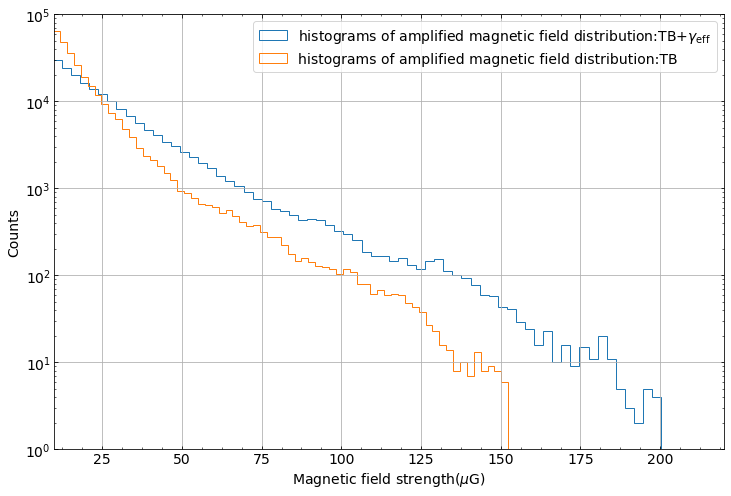

In [82]:
D1 = pp.pload(11) # Loading the data into a pload object D.
#grid.out dbl.out should contain
#这里的11是把只有tb情况下的10的数据改名字 为了不冲突能够读入
new_arrt = np.sqrt(D1.bx1.T*D1.bx1.T+D1.bx2.T*D1.bx2.T)*460.0+0.999
#type(new_arr)
#new_arr.size
#new_arr.shape

new_arr2 = new_arrt.flatten()#to 1d
#new_arr1.shape



f5 = plt.figure(figsize=[12,8])
ax5 = f5.add_subplot(111)
plt.hist(x=new_arr1,bins=70,log=True,histtype='step',label='histograms of amplified magnetic field distribution:TB+$\gamma\mathregular{_{eff}}$')
plt.hist(x=new_arr2,bins=70,log=True,histtype='step',label='histograms of amplified magnetic field distribution:TB')
plt.minorticks_on()
plt.grid(True)
plt.legend(loc=0,ncol=1)#0 is auto-set while ncol is lie shu
font1={'size':14}
ax5.set_xlabel(r'Magnetic field strength($\mu$G)',font1)
ax5.set_ylabel(r'Counts',font1)
ax5.axis([10.0,220.0,1.0,1.0e5])
plt.savefig('mag_counts_compared_2048.png',bbox_inches='tight')#不能存为pdf会跑挂

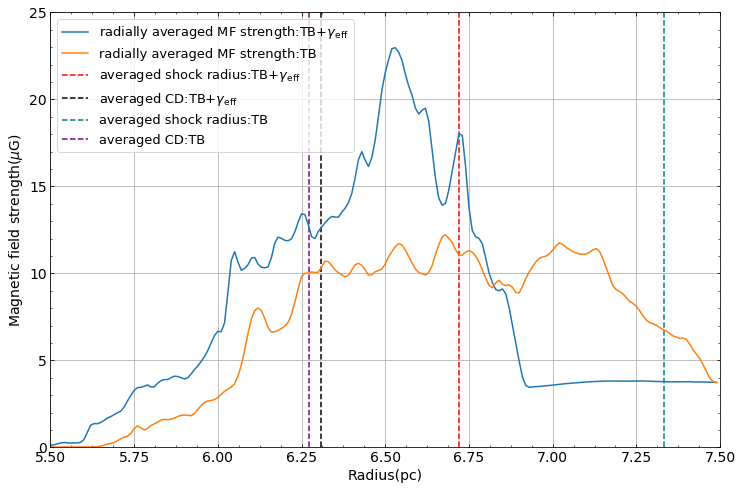

In [83]:
filename = 'magave_2048.txt'
X,Y = [],[]
with open(filename,'r') as f:
    lines = f.readlines()
    for line in lines:
        value = [float(s) for s in line.split()]
        X.append(value[0])
        Y.append(value[1])
Xnew = np.array(X)
Ynew1 = np.array(Y)#mag in code unit

filename = 'magave_onlytur_2048.txt'
X4t1,Y4t1 = [],[]
with open(filename,'r') as f:
    lines = f.readlines()
    for line in lines:
        value = [float(s) for s in line.split()]
        X4t1.append(value[0])
        Y4t1.append(value[1])
X4t1new = np.array(X4t1)
Y4t1new = np.array(Y4t1) # in order for mean() and other statistics funs


f3 = plt.figure(figsize=[12,8]) 
ax1 = f3.add_subplot(111) 
plt.plot(Xnew,Ynew1*460.0,label='radially averaged MF strength:TB+$\gamma\mathregular{_{eff}}$')
#460.0 is to muG
plt.vlines(x=Y1new.mean(),ymin=0.0,ymax=25.0,colors='red',linestyles='--',label='averaged shock radius:TB+$\gamma\mathregular{_{eff}}$')
plt.vlines(x=Ycd1new.mean(),ymin=0.0,ymax=25.0,colors='k',linestyles='--',label='averaged CD:TB+$\gamma\mathregular{_{eff}}$')
plt.plot(X4t1new,Y4t1new*460.0,label='radially averaged MF strength:TB')
plt.vlines(x=Y4tnew.mean(),ymin=0.0,ymax=25.0,colors='teal',linestyles='--',label='averaged shock radius:TB')
plt.vlines(x=Ycdtnew.mean(),ymin=0.0,ymax=25.0,colors='purple',linestyles='--',label='averaged CD:TB')
plt.grid(True)
plt.minorticks_on()
plt.legend(loc=0,ncol=1,fontsize=13)#0 is auto-set while ncol is lie shu 
font1={'size':14}
ax1.set_xlabel(r'Radius(pc)',font1) 
ax1.set_ylabel(r'Magnetic field strength($\mu$G)',font1) 
ax1.axis([5.5,7.5,0.0,25.0])
plt.savefig('mag_average_compared_2048.png',bbox_inches='tight')#不能存为pdf会跑挂

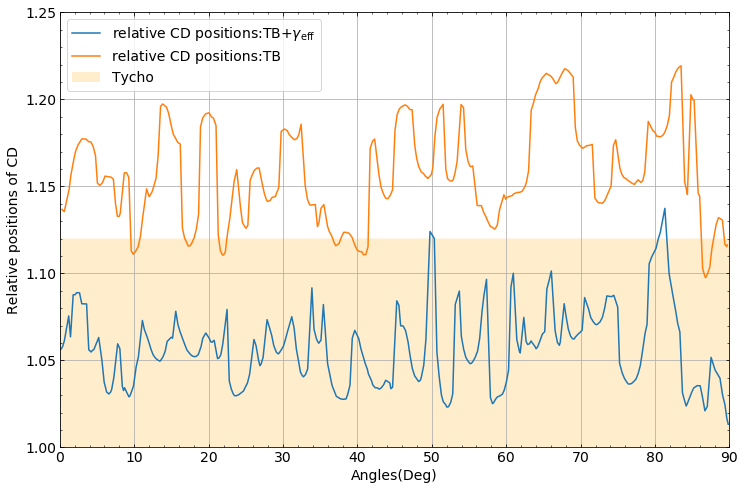

In [84]:
filename = 'rcdave300tycho_2048.txt'
Xcdtycho,Ycdtycho = [],[]
with open(filename,'r') as f:
    lines = f.readlines()
    for line in lines:
        value = [float(s) for s in line.split()]
        Xcdtycho.append(value[0])
        Ycdtycho.append(value[1])
Xcdnewt = np.array(Xcdtycho)
Ycdnewt = np.array(Ycdtycho) # in order for mean() and other statistics funs

Xfill = np.linspace(0.0,90.0,1000)
y1=1.00
y2=1.12 #tycho warren 2005



filename = 'radave300tycho_onlytur_2048.txt'
Xcdt1,Ycdt1 = [],[]
with open(filename,'r') as f:
    lines = f.readlines()
    for line in lines:
        value = [float(s) for s in line.split()]
        Xcdt1.append(value[0])
        Ycdt1.append(value[1])
Xcdtnew1 = np.array(Xcdt1)
Ycdtnew1 = np.array(Ycdt1) # in order for mean() and other statistics funs


filename = 'rcdave300tycho_onlytur_2048.txt'
Xcdt2,Ycdt2 = [],[]
with open(filename,'r') as f:
    lines = f.readlines()
    for line in lines:
        value = [float(s) for s in line.split()]
        Xcdt2.append(value[0])
        Ycdt2.append(value[1])
Xcdtnew2 = np.array(Xcdt2)
Ycdtnew2 = np.array(Ycdt2) # in order for mean() and other statistics funs


fcd = plt.figure(figsize=[12,8]) 
ax1 = fcd.add_subplot(111) 
plt.plot(Xcdnewt,Ytychonew/Ycdnewt,label='relative CD positions:TB+$\gamma\mathregular{_{eff}}$')
plt.plot(Xcdtnew2,Ycdtnew1/Ycdtnew2,label='relative CD positions:TB')
plt.fill_between(Xfill,y1,y2,facecolor='orange',alpha=0.2,label='Tycho')
plt.grid(True)
plt.minorticks_on()
plt.legend(loc=0,ncol=1)#0 is auto-set while ncol is lie shu 
font1={'size':14}
ax1.set_xlabel(r'Angles(Deg)',font1) 
ax1.set_ylabel(r'Relative positions of CD',font1) 
ax1.axis([0.0,90.0,1.0,1.25])
#ax1.set_title(r'radius profile with t=1000 years')
plt.savefig('cd_ratio_Tycho_compared_2048.png',bbox_inches='tight')#不能存为pdf会跑挂

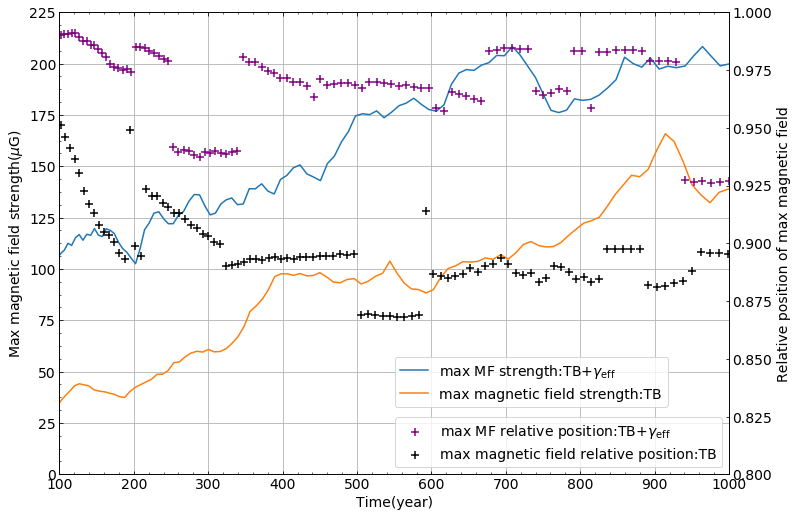

In [94]:
filename = 'maxmag_2048.txt'
X,Y = [],[]
with open(filename,'r') as f:
    lines = f.readlines()
    for line in lines:
        value = [float(s) for s in line.split()]
        X.append(value[0])
        Y.append(value[1])
Xnew = np.array(X)
Ynew = np.array(Y)#mag in code unit

filename = 'maxmag_2048_onlytur.txt'
Xd,Yd = [],[]
with open(filename,'r') as f:
    lines = f.readlines()
    for line in lines:
        value = [float(s) for s in line.split()]
        Xd.append(value[0])
        Yd.append(value[1])
Xdnew = np.array(Xd)
Ydnew = np.array(Yd)#mag in code unit


filename = 'magpos_2048.txt'
xpos,ypos = [],[]
with open(filename,'r') as f:
    lines = f.readlines()
    for line in lines:
        value = [float(s) for s in line.split()]
        xpos.append(value[0])
        ypos.append(value[1])
xposnew = np.array(xpos)
yposnew = np.array(ypos)#mag in code unit


filename = 'magpos_2048_onlytur.txt'
xpost,ypost = [],[]
with open(filename,'r') as f:
    lines = f.readlines()
    for line in lines:
        value = [float(s) for s in line.split()]
        xpost.append(value[0])
        ypost.append(value[1])
xposnewt = np.array(xpost)
yposnewt = np.array(ypost)#mag in code unit

f3 = plt.figure(figsize=[12,8.5]) 
ax1 = f3.add_subplot(111) 
ls1=ax1.plot(Xnew*1000.0,Ynew*460.0,label='max MF strength:TB+$\gamma\mathregular{_{eff}}$')#460.0 is to muG
ls2=ax1.plot(Xdnew*1000.0,Ydnew*460.0,label='max magnetic field strength:TB')#460.0 is to muG
ax1.legend(bbox_to_anchor=(0.49,0.27),fontsize=14)#0 is auto-set while ncol is lie shu 
plt.grid(True)
plt.minorticks_on()
#plt.legend(loc=0,ncol=1)#0 is auto-set while ncol is lie shu 
font1={'size':14}
ax1.set_xlabel(r'Time(year)',font1) 
ax1.set_ylabel(r'Max magnetic field strength($\mu$G)',font1) 
ax1.axis([100,1000,0.0,225.0])
ax2 = ax1.twinx()
font1={'size':14}
ax2.set_ylabel(r'Relative position of max magnetic field',font1) 
ls3=ax2.scatter(xposnew*1000.0,yposnew,color='purple',marker='+',s=50,label='max MF relative position:TB+$\gamma\mathregular{_{eff}}$')
ls4=ax2.scatter(xposnewt*1000.0,yposnewt,color='black',marker='+',s=50,label='max magnetic field relative position:TB')
ax2.axis([100,1000,0.80,1.0])
#ax2.legend(bbox_to_anchor=(0.98,0.15),fontsize=14)
ax2.legend(loc=4,ncol=1)#0 is auto-set while ncol is lie shu 

# ls = ls1 + ls2 + ls3 + ls4
# labs=[l.get_label() for l in ls]
# ax2.legend(ls,labs,loc=4)

plt.savefig('max_mag_pos_compared_2048.png',bbox_inches='tight')#不能存为pdf会跑挂